In [69]:
import pandas as pd
import numpy as np
#220797
# Load the data from the text file into a DataFrame
df = pd.read_csv(r'C:\Users\benia\VScodeprojects\Physical_Models\doi_10_5061_dryad_stqjq2c8p__v20240130\dryad\dryad\Swimming\N2_Adult\020422_N2_A1_Swim_0001_W1_.txt', sep="\t")

# Convert the DataFrame to a numpy array
data = df.values

df.head()
# Now, 'data' can be used as input for an ANN

,Time,1,2,3,4,5,6,7,8,9,10,Data from file 020422_N2_A1_Swim_0001 frames 1-2470 worm 1 worm length 1018.4 um
0,0.000,-2.619,0.734,2.023,1.894,1.672,0.990,1.517,1.833,0.750,-1.480,NaN
1,0.071,-3.393,-1.776,-0.796,-0.056,0.362,-0.381,0.612,1.969,1.798,-0.080,NaN
2,0.143,-4.554,-4.170,-2.976,-2.060,-1.827,-2.966,-1.598,0.957,2.154,1.039,NaN
3,0.214,-2.847,-4.899,-4.380,-3.436,-3.029,-3.922,-3.032,-1.002,1.071,1.581,NaN
4,0.286,-4.102,-5.629,-5.199,-4.208,-3.945,-4.855,-4.069,-2.355,-0.665,-0.225,NaN


In [70]:
# Change the last column's values to 'pe swim'
df.iloc[:, -1] = 'swim'
# Rename the last column to 'type'
df.rename(columns={df.columns[-1]: 'type'}, inplace=True)
# Change the last column's type to 'category'
df.iloc[:, -1] = df.iloc[:, -1].astype('category')

C:\Users\benia\AppData\Local\Temp\ipykernel_10100\385880711.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'swim' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:, -1] = 'swim'


In [71]:
# Load the new data
df2 = pd.read_csv(r'C:\Users\benia\VScodeprojects\Physical_Models\doi_10_5061_dryad_stqjq2c8p__v20240130\dryad\dryad\Crawling\N2_Adult\072522_N2_adult_crawl_0006.txt', sep="\t")

# Set the last column's values to 'crawl'
df2.iloc[:, -1] = 'crawl'

# Rename the last column to 'type'
df2.rename(columns={df2.columns[-1]: 'type'}, inplace=True)

# Change the last column's type to 'category'
df2.iloc[:, -1] = df2.iloc[:, -1].astype('category')

# Concatenate df2 to the original DataFrame
df = pd.concat([df, df2], ignore_index=True)
df = df.drop('Time', axis=1)

C:\Users\benia\AppData\Local\Temp\ipykernel_10100\3221432233.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'crawl' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.iloc[:, -1] = 'crawl'


In [72]:
# Drop non-numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Convert DataFrame to numpy array
M = df_numeric.values
# Calculate the covariance matrix
cov_matrix = df_numeric.cov()
cov_matrix.shape

(10, 10)

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Get the first two eigenvectors
eigenvector_1 = eigenvectors[:, 0]
eigenvector_2 = eigenvectors[:, 1]

# Project the data onto the first two eigenvectors
projected_data = df_numeric.dot(np.array([eigenvector_1, eigenvector_2]).T)


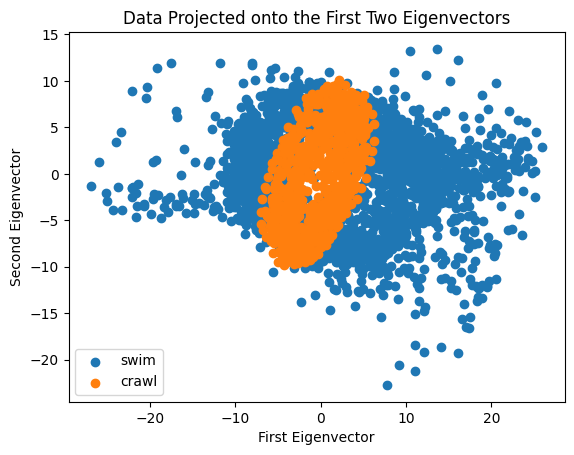

In [127]:
# Convert the 'type' column to numerical values
type_numerical = df['type'].astype('category').cat.codes
# Get unique types
types = df['type'].unique()

# Create a scatter plot for each type
for type in types:
    mask = df['type'] == type
    plt.scatter(projected_data[0][mask], projected_data[1][mask], label=type)

plt.xlabel('First Eigenvector')
plt.ylabel('Second Eigenvector')
plt.title('Data Projected onto the First Two Eigenvectors')
plt.legend()  # Add a legend
plt.show()

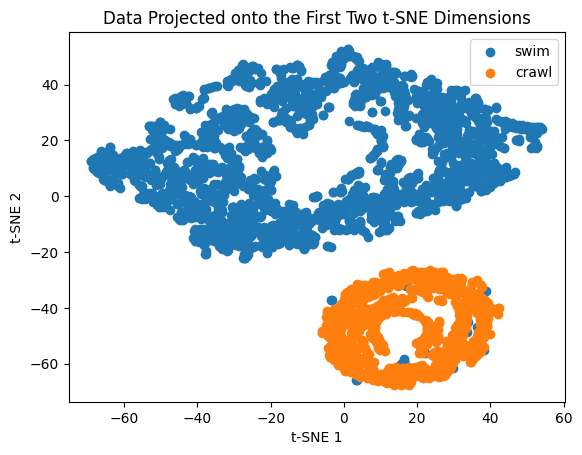

In [76]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df_numeric)

# Plot the t-SNE results
for type in types:
    mask = df['type'] == type
    plt.scatter(tsne_data[mask, 0], tsne_data[mask, 1], label=type)

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Data Projected onto the First Two t-SNE Dimensions')
plt.legend()
plt.show()

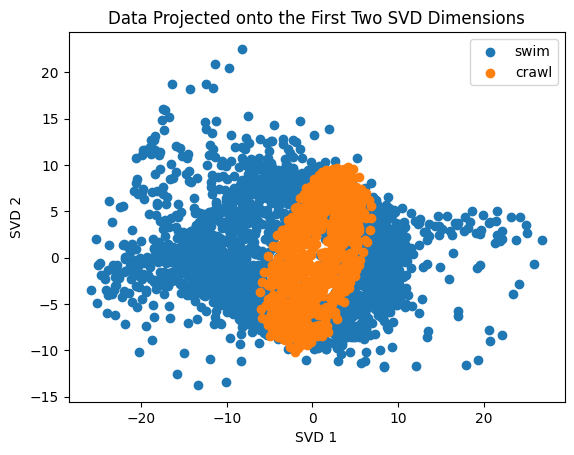

In [106]:
from sklearn.decomposition import TruncatedSVD

# Perform SVD dimensionality reduction
svd = TruncatedSVD(n_components=4)
svd_data = svd.fit_transform(df_numeric)

# Plot the SVD results
for type in types:
    mask = df['type'] == type
    plt.scatter(svd_data[mask, 0], svd_data[mask, 1], label=type)

plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.title('Data Projected onto the First Two SVD Dimensions')
plt.legend()
plt.show()

In [84]:
import numpy as np

# Compute the SVD
U, S, VT = np.linalg.svd(df_numeric, full_matrices=False)

# The singular values are given by S. To get the singular vectors, you can use U and VT.
# The matrix U contains the left singular vectors, and the matrix VT contains the right singular vectors.

# To get the reduced dimension representation, you can multiply U with S (after reshaping S to a diagonal matrix)
S_diag = np.diag(S)
svd_data_manual = np.dot(U, S_diag)

# Now svd_data_manual contains the same information as svd_data in your original code

In [166]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from scipy.linalg import eigh

# Create a graph of nearest neighbors
n_neighbors = 10  # You can adjust this parameter
A = kneighbors_graph(df_numeric, n_neighbors, include_self=False).toarray()

# Compute the degree matrix
D = np.diag(A.sum(axis=1))

# Compute the Laplacian matrix
L = D - A

# Compute the eigenvalues and eigenvectors of the Laplacian matrix
eigvals, eigvecs = eigh(L)


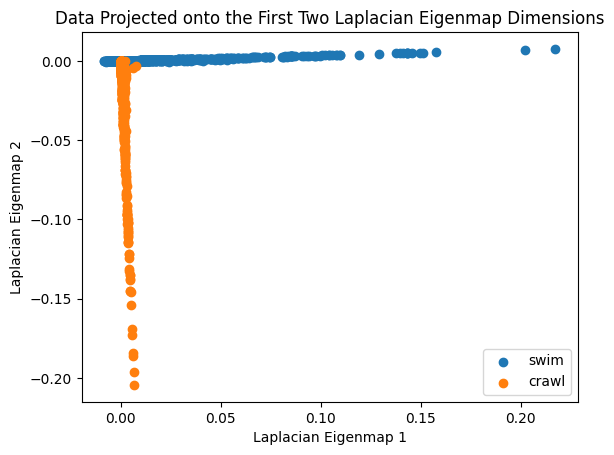

In [167]:

# Select the eigenvectors corresponding to the two smallest eigenvalues (excluding the smallest one which is always zero)
embedding = eigvecs[:, 2:4]

# Plot the results
for type in types:
    mask = df['type'] == type
    plt.scatter(embedding[mask, 0], embedding[mask, 1], label=type)

plt.xlabel('Laplacian Eigenmap 1')
plt.ylabel('Laplacian Eigenmap 2')
plt.title('Data Projected onto the First Two Laplacian Eigenmap Dimensions')
plt.legend()
plt.show()

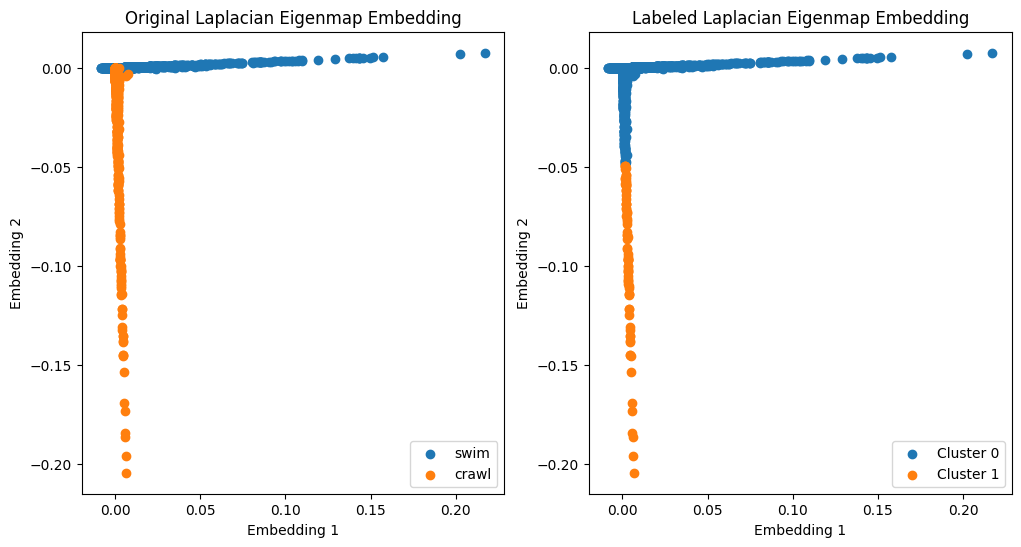

The percentage of mismatched labels is 22.90%


In [170]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Define KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
# Fit the model to the embedding
kmeans.fit(embedding)

# Get the cluster assignments
clusters = kmeans.labels_

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original embedding in the first subplot
for type in types:
    mask = df['type'] == type
    ax[0].scatter(embedding[mask, 0], embedding[mask, 1], label=type)

ax[0].set_xlabel('Embedding 1')
ax[0].set_ylabel('Embedding 2')
ax[0].set_title('Original Laplacian Eigenmap Embedding')
ax[0].legend()

# Plot the labeled data in the second subplot
for cluster in range(2):
    mask = clusters == cluster
    ax[1].scatter(embedding[mask, 0], embedding[mask, 1], label=f'Cluster {cluster}')

ax[1].set_xlabel('Embedding 1')
ax[1].set_ylabel('Embedding 2')
ax[1].set_title('Labeled Laplacian Eigenmap Embedding')
ax[1].legend()

plt.show()

# Define cluster names
cluster_names = {0: 'swim', 1: 'crawl'}

# Map cluster labels to names
cluster_labels = [cluster_names[label] for label in clusters]

# Create a DataFrame with the true and predicted labels
df_labels = pd.DataFrame({'true': df['type'], 'predicted': cluster_labels})

# Find the percentage of mismatched labels
mismatched = df_labels[df_labels['true'] != df_labels['predicted']]
mismatch_percentage = len(mismatched) / len(df_labels) * 100

print(f'The percentage of mismatched labels is {mismatch_percentage:.2f}%')

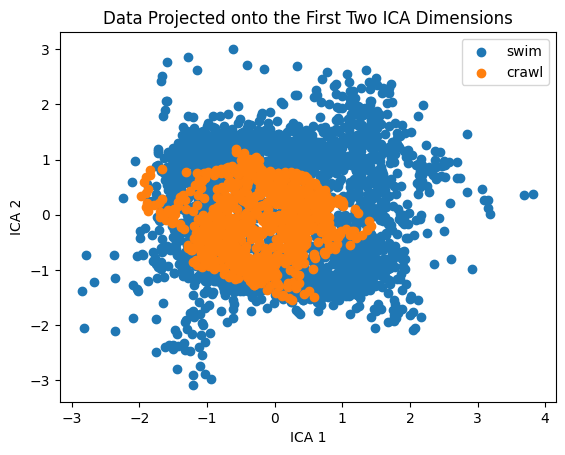

In [117]:
from sklearn.decomposition import FastICA

# Perform ICA dimensionality reduction
ica = FastICA(n_components=4, random_state=0)
ica_data = ica.fit_transform(df_numeric)

# Plot the ICA results
for type in types:
    mask = df['type'] == type
    plt.scatter(ica_data[mask, 0], ica_data[mask, 1], label=type)

plt.xlabel('ICA 1')
plt.ylabel('ICA 2')
plt.title('Data Projected onto the First Two ICA Dimensions')
plt.legend()
plt.show()

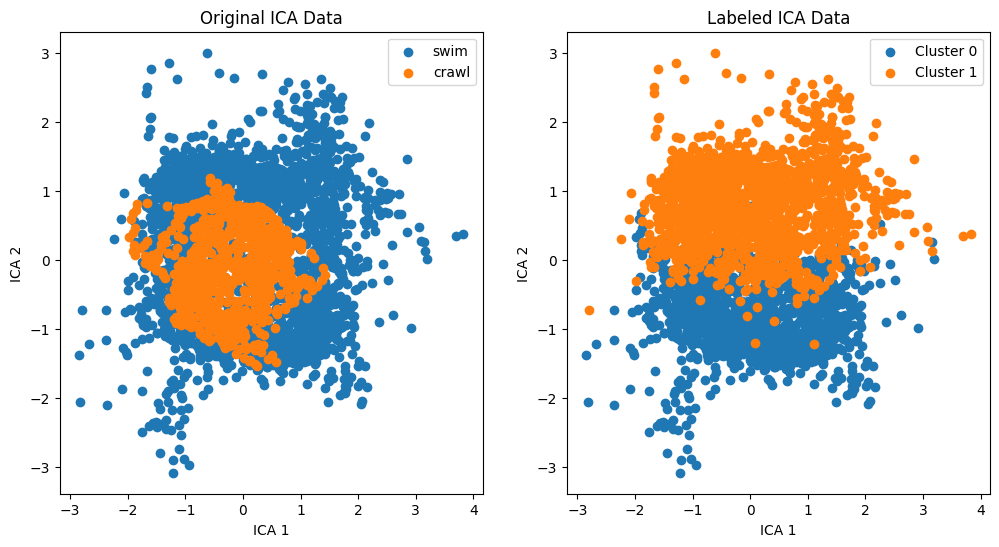

In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to the ICA data
kmeans.fit(ica_data[:,0:3])

# Get the cluster assignments
clusters = kmeans.labels_

# Define cluster names
cluster_names = {0: 'swim', 1: 'crawl'}

# Map cluster labels to names
cluster_labels = [cluster_names[label] for label in clusters]

# Create a DataFrame with the true and predicted labels
df_labels = pd.DataFrame({'true': df['type'], 'predicted': cluster_labels})

# Find the percentage of mismatched labels
mismatched = df_labels[df_labels['true'] != df_labels['predicted']]
mismatch_percentage = len(mismatched) / len(df_labels) * 100

print(f'The percentage of mismatched labels is {mismatch_percentage:.2f}%')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original ICA data in the first subplot
for type in types:
    mask = df['type'] == type
    ax[0].scatter(ica_data[mask, 0], ica_data[mask, 1], label=type)

ax[0].set_xlabel('ICA 1')
ax[0].set_ylabel('ICA 2')
ax[0].set_title('Original ICA Data')
ax[0].legend()

# Plot the labeled data in the second subplot
for cluster in range(2):
    mask = clusters == cluster
    ax[1].scatter(ica_data[mask, 0], ica_data[mask, 1], label=f'Cluster {cluster}')

ax[1].set_xlabel('ICA 1')
ax[1].set_ylabel('ICA 2')
ax[1].set_title('Labeled ICA Data')
ax[1].legend()

plt.show()



The percentage of mismatched labels is 53.26%


In [142]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Step 1: Compute the pairwise distance matrix
dist_matrix = squareform(pdist(df_numeric))

# Step 2: Compute the kernel matrix
sigma = np.median(dist_matrix)  # This is a common choice for the kernel bandwidth
kernel_matrix = np.exp(-dist_matrix ** 2 / (2 * sigma ** 2))

# Step 3: Normalize the kernel matrix to get the transition matrix
row_sums = kernel_matrix.sum(axis=1)
transition_matrix = kernel_matrix / row_sums[:, np.newaxis]

# Step 4: Compute the eigenvalues and eigenvectors of the transition matrix
eigvals, eigvecs = eigh(transition_matrix**2)

# Step 5: The diffusion map is given by the eigenvectors scaled by the corresponding eigenvalues
diffusion_map = eigvecs * eigvals


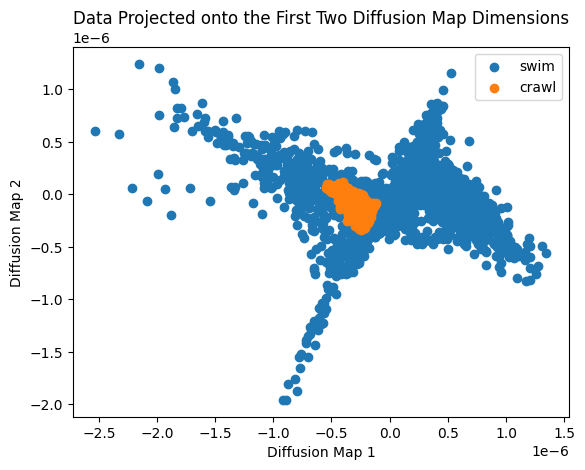

In [151]:
# Get unique types
types = df['type'].unique()

# Create a scatter plot for each type
for type in types:
    mask = df['type'] == type
    plt.scatter(diffusion_map[mask, 0], diffusion_map[mask, 1], label=type)

plt.xlabel('Diffusion Map 1')
plt.ylabel('Diffusion Map 2')
plt.title('Data Projected onto the First Two Diffusion Map Dimensions')
plt.legend()
plt.show()